<a href="https://colab.research.google.com/github/ismael20315001/Comptage_Objets/blob/main/detectionPeauNonPeau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
from skimage import io, color
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.color import rgb2lab, lab2rgb
import os
from PIL import Image
import glob
from skimage import exposure
from skimage.exposure import match_histograms
from math import *
import csv
import pandas as pd

In [ ]:
## Fonction permettant d'acquerir des à partir du chemin mis en paramètreimages sous la colorimétrie RGB
def acquisitionImage(chemin):
    l = []
    liste = []
    for im in chemin:
        l.append(im)
    l.sort() ## Trie les images dans l'ordre croissant
    for im in l:
        im = cv2.imread(str(im))
        image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) ## Mets les images en RGB
        liste.append(image)
    return np.array(liste) ## Retourne une matrice de plusieurs dimensions d'images


## Fonction permettant de changer l'espace colorimétrique des images de RBG en Lab
def transformeRGB2LAB(t_RGB):
    t_lab = [0] * t_RGB.shape[0]
    for i, img in enumerate(t_RGB):
        t_lab[i] = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    return np.array(t_lab)

In [ ]:
cheminImage = glob.glob("/content/drive/MyDrive/dataset_images/train/original/*.jpg")
cheminMask = glob.glob("/content/drive/MyDrive/dataset_images/train/label/*.png")

In [ ]:
## Appel de la fonction d'acquisition d'images
listeImage = acquisitionImage(cheminImage)
## Appel de la fonction d'acquisition de labels
listeMask = acquisitionImage(cheminMask)
print(listeImage.shape)

(1200, 227, 227, 3)


In [ ]:
## Appel de la fonction de changement d'espace colorimétrique RBG pour Lab
listeImageLab = transformeRGB2LAB(listeImage)

(-0.5, 226.5, 226.5, -0.5)

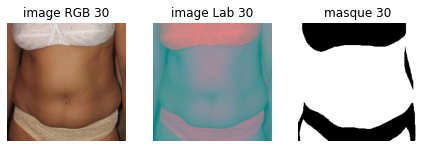

In [ ]:
## Permet d'afficher n'importe quelle image à une position i
## sous forme RBG, Lab et son masque
i = 30

plt.figure(figsize=(10, 10))
ax = plt.subplot(4, 4, 1)
plt.imshow(listeImage[i])
plt.title('image RGB {}'.format(i))
plt.axis("off")

ax = plt.subplot(4, 4, 2)
plt.imshow(listeImageLab[i])
plt.title('image Lab {}'.format(i))
plt.axis("off")

ax = plt.subplot(4, 4, 3)
plt.imshow(listeMask[i], cmap='gray')
plt.title('masque {}'.format(i))
plt.axis("off")

In [ ]:
## Séparation de l'espace colorimétrique Lab en L, a et b pour une image
l_luminance, a_couleur, b_couleur = cv2.split(listeImageLab[i])

print()
## Affiche la valeur minimale et maximale de la luminance de l'imge i
print('valeur minimale d\'un dans le chanel L : {}'.format(np.array(l_luminance).min()))
print('valeur maximale d\'un dans le chanel L : {}'.format(np.array(l_luminance).max()))
print()
## Affiche la valeur minimale et maximale de l'espace de couleur a de l'imge i
print('valeur minimale d\'un dans le chanel a : {}'.format(np.array(a_couleur).min()))
print('valeur maximale d\'un dans le chanel a : {}'.format(np.array(a_couleur).max()))
print()
## Affiche la valeur minimale et maximale de l'espace de couleur b de l'imge i
print('valeur minimale d\'un dans le chanel b : {}'.format(np.array(b_couleur).min()))
print('valeur maximale d\'un dans le chanel b : {}'.format(np.array(b_couleur).max()))


valeur minimale d'un dans le chanel L : 0
valeur maximale d'un dans le chanel L : 245

valeur minimale d'un dans le chanel a : 126
valeur maximale d'un dans le chanel a : 153

valeur minimale d'un dans le chanel b : 126
valeur maximale d'un dans le chanel b : 160


In [ ]:
# On convertie l'intervalle dans lequel les pixels prennent leurs valeurs pour les dimensions a et b

def convertLab8toLabx(t_img, ECHELLE):
    temp = [0] * 256
    for i in range(256):
        temp[i] = floor(i / (256/ECHELLE))
    
    for index, img in enumerate(t_img):
        h, w, d = img.shape
        image = np.asarray(np.zeros((h, w, d), dtype=np.uint8))

        for i in range(h):
            for j in range(w):
                for k in range(1, 3):
                    image[i, j][k] = temp[img[i, j][k]]
                image[i, j][0] = img[i, j][0]
        t_img[index] = image
        
    return t_img

In [ ]:
ECHELLE = 256
listeImageLabConvertir = convertLab8toLabx(listeImageLab, ECHELLE)

In [ ]:
## Séparation de l'espace colorimétrique Lab en L, a et b pour une image convertir
l_luminance, a_couleur, b_couleur = cv2.split(listeImageLabConvertir[i])

## Affiche la valeur minimale et maximale de la luminance de l'imge i convertir
print()
print('valeur minimale d\'un dans le chanel L : {}'.format(np.array(l_luminance).min()))
print('valeur maximale d\'un dans le chanel L : {}'.format(np.array(l_luminance).max()))
## Affiche la valeur minimale et maximale de l'espace de couleur a de l'imge i convertir
print()
print('valeur minimale d\'un dans le chanel a : {}'.format(np.array(a_couleur).min()))
print('valeur maximale d\'un dans le chanel a : {}'.format(np.array(a_couleur).max()))
## Affiche la valeur minimale et maximale de l'espace de couleur b de l'imge i convertir
print()
print('valeur minimale d\'un dans le chanel b : {}'.format(np.array(b_couleur).min()))
print('valeur maximale d\'un dans le chanel b : {}'.format(np.array(b_couleur).max()))


valeur minimale d'un dans le chanel L : 0
valeur maximale d'un dans le chanel L : 245

valeur minimale d'un dans le chanel a : 126
valeur maximale d'un dans le chanel a : 153

valeur minimale d'un dans le chanel b : 126
valeur maximale d'un dans le chanel b : 160


(-0.5, 226.5, 226.5, -0.5)

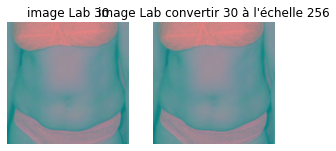

In [ ]:
# Visualisation de l'image d'origine Lab et celle convertir Lab

i = 30
plt.figure(figsize=(10, 20))
ax = plt.subplot(4, 4, 1)
plt.imshow(listeImageLab[i])
plt.title('image Lab {}'.format(i))
plt.axis("off")

ax = plt.subplot(4, 4, 2)
plt.imshow(listeImageLabConvertir[i])
plt.title('image Lab convertir {} à l\'échelle {}'.format(i, ECHELLE))
plt.axis("off")

In [ ]:
# Représente la valuer d'un pixel de l'image Lab pour dire s'il est peau ou non
SEUIL = 100
# Initialisation des valeurs à zéro pour la peau
nombrePixelPeau = np.zeros((ECHELLE, ECHELLE))
# Initialisation des valeurs à zéro pour la non-peau
nombrePixelNonPeau = np.zeros((ECHELLE, ECHELLE))
# print(nombrePixelPeau)

In [ ]:
## Détermine les nombre de pixels peau ou non-peau
for i, im in enumerate(listeImageLab):
    largeur, hauteur, epaisseur = im.shape
    l_luminance, a_couleur, b_couleur = cv2.split(im)
    masque = listeMask[i]
    for i in range(largeur):
        for j in range(hauteur):
            x, y = a_couleur.shape
            a, b, c = masque[i][j]
            k = a_couleur[i, j]
            z = b_couleur[i, j]
            if a > SEUIL and b > SEUIL and c > SEUIL:
                nombrePixelPeau[k, z] += 1
            if a < SEUIL:
                nombrePixelNonPeau[k, z] += 1
nombrePixelPeau = nombrePixelPeau / sum(sum(nombrePixelPeau)), sum(sum(nombrePixelPeau))
nombrePixelNonPeau = nombrePixelNonPeau / sum(sum(nombrePixelNonPeau)), sum(sum(nombrePixelNonPeau))

In [ ]:
x = np.linspace(0, ECHELLE-1, ECHELLE)
y = np.linspace(0, ECHELLE-1, ECHELLE)

X, Y = np.meshgrid(x, y)

histPeau, totalPeau = nombrePixelPeau
histNonPeau, totalNonPeau = nombrePixelNonPeau

In [ ]:
print('Nombre total de pixel peau: {}'.format(int(totalPeau)))
print('Nombre total de pixel non peau: {}'.format(int(totalNonPeau)))

Nombre total de pixel peau: 40599139
Nombre total de pixel non peau: 21234970


Using matplotlib backend: agg


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


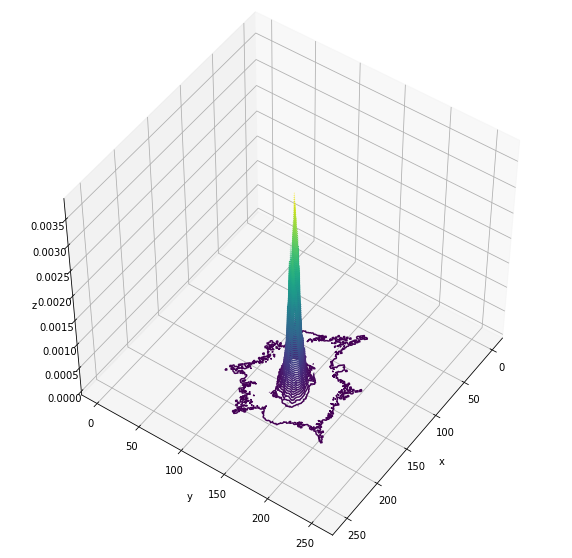

In [ ]:
## Affichage de l'histogramme normalisé 3D de la Peau
%matplotlib 

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, histPeau, 100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 35)
fig.show()

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


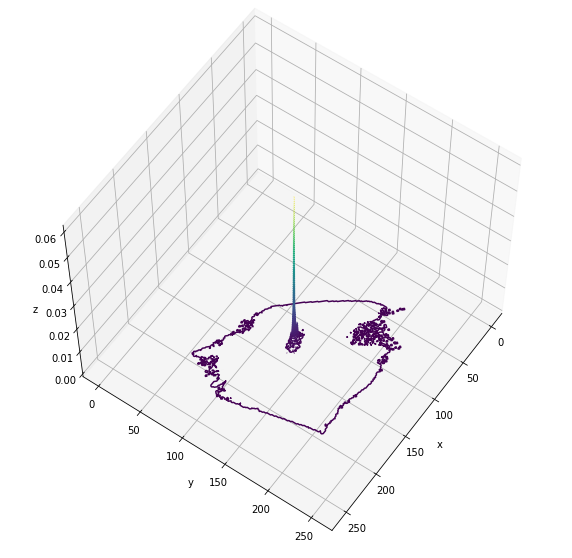

In [ ]:
## Affichage de l'histogramme normalisé 3D de la non-Peau
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, histNonPeau, 100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)

In [ ]:
## Récupère le chemin d'accès aux images pour le test
cheminImageTest = glob.glob("/content/drive/MyDrive/dataset_images/test/original_images/*.jpg")
## Récupère le chemin d'accès aux maques pour comparer avec le resultat obtenu
cheminMaskTest = glob.glob("/content/drive/MyDrive/dataset_images/test/skin_masks/*.png")

In [ ]:
## Appel de la fonction d'acquisition d'images
listeImageTest = acquisitionImage(cheminImageTest)
## Appel de la fonction d'acquisition de masques
listeMaskTest = acquisitionImage(cheminMaskTest)

In [ ]:
listeImageTestLab = transformeRGB2LAB(listeImageTest)

In [ ]:
## Fonction de calcul de la probabilité de pour vérifier si un pixel est peau
def evaluation_peau_bayes(a, b, histPeau, histNonPeau, totalPeau, totalNonPeau):
    try:
        u = histPeau[a, b] * (totalPeau / (totalPeau + totalNonPeau))
        probabilitePeau = u / (u + (histNonPeau[a, b] * (totalNonPeau / (totalPeau + totalNonPeau))))
    except:
        return 0
    return probabilitePeau

# Fonction qui permet de séparer la peau de la non-peau
def detection_peau(img, histPeau, histNonPeau, totalPeau, totalNonPeau, s):
    # On convertit l'image de test dans l'espace lab
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    
    # On modifie les intervalles de a et b
    temp = [0] * 256
    for i in range(256):
        temp[i] = floor(i / (256/ECHELLE))
    
    h, w, d = img_lab.shape
    image = np.asarray(np.zeros((h, w, d), dtype=np.uint8))

    for i in range(h):
        for j in range(w):
            for k in range(1, 3):
                image[i, j][k] = temp[img_lab[i, j][k]]
            image[i, j][0] = img_lab[i, j][0]
    img_lab = image
    
    # On détecte la peau en mettant à 0 les pixels non peau
    for i in range(h):
        for j in range(w):
            if not evaluation_peau_bayes(img_lab[i, j][1], img_lab[i, j][2], histPeau, histNonPeau, totalPeau, totalNonPeau) >= s:
                for k in range(0, d):
                    img[i, j][k] = 0
    
    return img

## Fonction qui permet d'afficher le résultat qu'on attend 
def peau_normale(img, masque):
    x, y, e = masque.shape

    for i in range(x):
        for j in range(y):
            a, b, c = masque[i][j]
            if a < SEUIL and b < SEUIL and c < SEUIL:
                for k in range(0, e):
                    img[i, j][k] = 0
                    
    return img

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


(-0.5, 226.5, 226.5, -0.5)

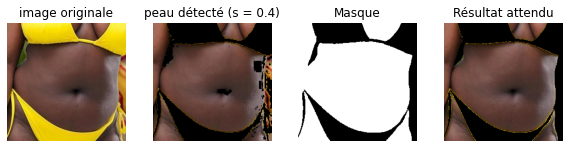

In [ ]:
%matplotlib inline

## Récupération de l'image test et son masque en position 5
image = listeImageTest[5]
masque = listeMaskTest[5]

## Affiche l'image d'origine 
plt.figure(figsize=(10, 10))
ax = plt.subplot(4, 4, 1)
plt.imshow(image)
plt.title('image originale')
plt.axis("off")

## Affiche le résultat en passant par la méthode de Bayes pour différentier la peau de la non-peau
ax = plt.subplot(4, 4, 2)
plt.imshow(detection_peau(image.copy(), histPeau, histNonPeau, totalPeau, totalNonPeau, 0.4))
plt.title('peau détecté (s = 0.4)')
plt.axis("off")

## Affiche le masque de l'image d'origine
ax = plt.subplot(4, 4, 3)
plt.imshow(masque, cmap='gray')
plt.title('Masque')
plt.axis("off")

## Affiche le résultat qu'on était censé avoir
ax = plt.subplot(4, 4, 4)
plt.imshow(peau_normale(image.copy(), masque))
plt.title('Résultat attendu')
plt.axis("off")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


(-0.5, 226.5, 226.5, -0.5)

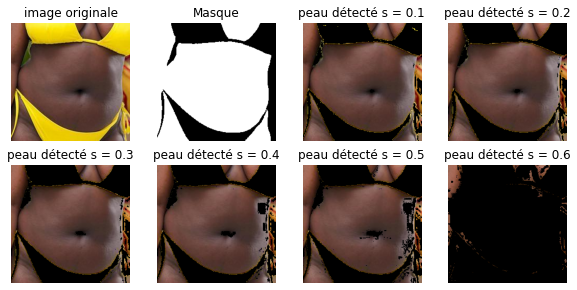

In [ ]:
## Affiche la mème image avec la méthode de Bayes en variant le seuil de détection 

plt.figure(figsize=(10, 10))
ax = plt.subplot(4, 4, 1)
plt.imshow(image)
plt.title('image originale')
plt.axis("off")

ax = plt.subplot(4, 4, 2)
plt.imshow(masque, cmap='gray')
plt.title('Masque')
plt.axis("off")

ax = plt.subplot(4, 4, 3)
plt.imshow(detection_peau(image.copy(), histPeau, histNonPeau, totalPeau, totalNonPeau, 0.1))
plt.title('peau détecté s = 0.1')
plt.axis("off")

ax = plt.subplot(4, 4, 4)
plt.imshow(detection_peau(image.copy(), histPeau, histNonPeau, totalPeau, totalNonPeau, 0.2))
plt.title('peau détecté s = 0.2')
plt.axis("off")

ax = plt.subplot(4, 4, 5)
plt.imshow(detection_peau(image.copy(), histPeau, histNonPeau, totalPeau, totalNonPeau, 0.3))
plt.title('peau détecté s = 0.3')
plt.axis("off")

ax = plt.subplot(4, 4, 6)
plt.imshow(detection_peau(image.copy(), histPeau, histNonPeau, totalPeau, totalNonPeau, 0.4))
plt.title('peau détecté s = 0.4')
plt.axis("off")

ax = plt.subplot(4, 4, 7)
plt.imshow(detection_peau(image.copy(), histPeau, histNonPeau, totalPeau, totalNonPeau, 0.5))
plt.title('peau détecté s = 0.5')
plt.axis("off")

ax = plt.subplot(4, 4, 8)
plt.imshow(detection_peau(image.copy(), histPeau, histNonPeau, totalPeau, totalNonPeau, 0.95))
plt.title('peau détecté s = 0.6')
plt.axis("off")

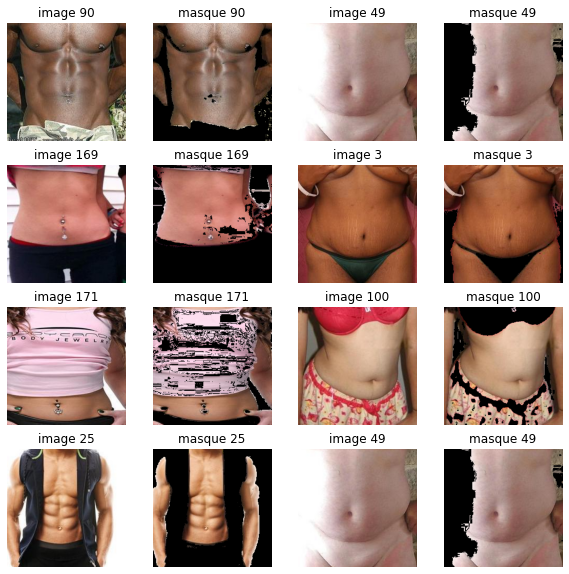

In [ ]:
# On affiche quelques images et les résulats obtenus avec une mème valeur de seui de  détection qui est 0.4

plt.figure(figsize=(10, 10))
for k, i in np.ndenumerate(np.random.randint(listeImageTest.shape[0], size=8)):
    ax = plt.subplot(4, 4, 2 * k[0] + 1)
    plt.imshow(listeImageTest[i], cmap='gray')
    plt.title('image {}'.format(i))
    plt.axis("off")
    x = plt.subplot(4, 4, 2 * k[0] + 2)
    plt.imshow(detection_peau(listeImageTest[i].copy(), histPeau, histNonPeau, totalPeau, totalNonPeau, 0.4), cmap='gray')
    plt.title('masque {}'.format(i))
    plt.axis("off")

In [ ]:
# Lissage de l'image avec le filtre moyenneur
im1 = cv2.medianBlur(listeImageTest[49].copy(), 19)

(-0.5, 226.5, 226.5, -0.5)

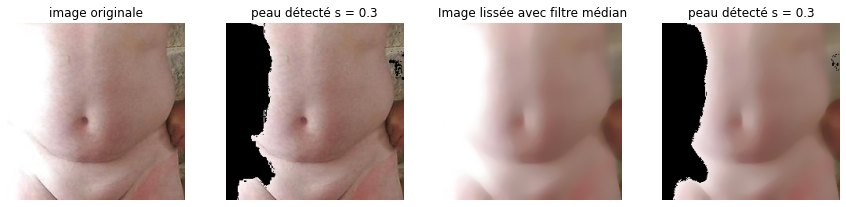

In [ ]:
## Affiche du résultat sans filtre et avec filtre

plt.figure(figsize=(15, 15))
ax = plt.subplot(4, 4, 1)
plt.imshow(listeImageTest[49])
plt.title('image originale')
plt.axis("off")

ax = plt.subplot(4, 4, 2)
plt.imshow(detection_peau(listeImageTest[49].copy(), histPeau, histNonPeau, totalPeau, totalNonPeau, 0.3))
plt.title('peau détecté s = 0.3')
plt.axis("off")

ax = plt.subplot(4, 4, 3)
plt.imshow(im1)
plt.title('Image lissée avec filtre médian')
plt.axis("off")

ax = plt.subplot(4, 4, 4)
plt.imshow(detection_peau(im1.copy(), histPeau, histNonPeau, totalPeau, totalNonPeau, 0.3))
plt.title('peau détecté s = 0.3')
plt.axis("off")